# Viscoelastic Oldroyd-B model -- rolling asphalt

## Computation in the time varying domain
We show how to solve problem in time varying domains. We transform the equations describing the viscoelastic Oldroyd-B model from Eulerian description where the domain deforms into
a description with a fixed domain. In order to do this we add a new variable deformation
$\hat{\mathbf{u}}$. The mapping $\hat{\varphi}$ maps fixed domain $\Omega_{\chi}$ into the deforming domain $\Omega_{x}$, see the Figure below.<p>
<div align=center>
<img src="fig/deformation_domain.png" width="750"/>
</div>

There are two popular transformations:
1. The fixed domain corresponds to the **Lagrangian description** where all points in the domain are material
points and $\mathbf{u}$ is the physical deformation.
2. The so-called **arbitrary Lagrangian-Eulerian** (ALE) formulation where deformation $\hat{\mathbf{u}}$ is
arbitrary with the restriction that the envelop of the deformed remains the same.


### Lagrangian formulation
The computational mesh is identified with the reference Lagrangian configuration, so the mapping $\varphi$ is defined as
\begin{equation}
\varphi: X \to x:= X+\mathbf{u}.
\end{equation}
We define the following kinematic quantities. The velocity $\mathbf{v}$ 
\begin{equation}
\mathbf{v}:=\frac{\partial \varphi}{\partial t}\Big|_{X}=\frac{\partial\mathbf{u}}{\partial t},
\end{equation}
the deformation gradient $\mathbb{F}$ and its Jacobian $J$ by
\begin{equation}
\mathbb{F}:=\frac{\partial \varphi}{\partial X}=\mathbb{I}+\nabla_X\mathbf{u},\quad J=\det\mathbb{F}.
\end{equation}

The aim to transform the weak form of the governing equations from $\Omega_x$ to $\Omega_X$
\begin{align*}
&\int_{\Omega_x} \mathrm{div}_x\,\mathbf{v} \,  q\; \mathrm{d}\mathbf{x} = 0,\\
&\int_{\Omega_x} \rho\left(\frac{\partial\mathbf{v}}{\partial t}+\mathbf{v}\cdot\nabla_x\mathbf{v}\right)\cdot\mathbf{q}\; \mathrm{d}\mathbf{x} = \int_{\Omega_x} \mathrm{div}_x \mathbb{T}\cdot \mathbf{q}\; \mathrm{d}\mathbf{x},\\
&\int_{\Omega_x} \left(\frac{\partial\mathbb{B}}{\partial t}+{\bf v}\cdot\nabla_x\mathbb{B}-(\nabla{\bf v})\mathbb{B}-\mathbb{B}(\nabla{\bf v})^{\rm T}+\frac{G}{\mu_1}(\mathbb{B}-\mathbb{I})\right)\cdot\mathbb{Q}=0,
\end{align*}

First we check, how the spatial derivative transforms
\begin{equation}
\nabla_x\mathbf{v}=\frac{\partial\mathbf{v}(\varphi(X, t), t)}{\partial X} = \frac{\partial\mathbf{v}}{\partial\mathbf{x}}\frac{\partial\varphi}{\partial X}=(\nabla_x\mathbf{v})\mathbb{F} \quad \Rightarrow \quad (\nabla_x\mathbf{v})=(\nabla_X\mathbf{v})\mathbb{F}^{-1}.
\end{equation}
Next, we check the material time derivative of scalar $s$
\begin{equation}
\frac{\partial s}{\partial t}\Big|_X = \frac{\mathrm{d}s(\varphi(X,t),t)}{\mathrm{d}t}\Big|_X=\frac{\partial s}{\partial t}\Big|_x+\frac{\partial s}{\partial x}\frac{\partial \varphi}{\partial t}\Big|_X=\frac{\partial s}{\partial t}\Big|_x+\mathbf{v}\cdot\nabla_x s.
\end{equation}

Finally, the integrals over $\Omega_x$ are transformed to the integrals over $\Omega_X$ using the integral substitution theorem. The Piola identity in the form
\begin{equation}
\mathrm{div}_X(J\mathbb{F}^{-\rm T})=0
\end{equation}
is employed in the integral
\begin{align*}
\int_{\Omega_x}\mathrm{div}_x\mathbb{T}\cdot\mathbf{q}\;\mathrm{d}\mathbf{x}=
\int_{\Omega_X}J (\nabla_X\mathbb{T})\mathbb{F}^{-\rm T}\cdot\mathbf{q}\;\mathrm{d}\mathbf{X}&=
\int_{\Omega_X}J \big((\nabla_X\mathbb{T})\mathbb{F}^{-\rm T}\cdot\mathbf{q}+\mathbb{\mathrm{div}_{X}(J\mathbb{F}^{-\rm T})}\big)\;\mathrm{d}\mathbf{X}\\
&=\int_{\Omega_X}\mathrm{div}_X(J\mathbb{T}\mathbb{F}^{-\rm T})\cdot\mathbf{q}\,\mathrm{d}\mathbf{X}.
\end{align*}

The weak formulation in the Lagrangian formulation then reads
\begin{align*}
\int_{\Omega_X} J \mathrm{tr}\big((\nabla_X\,\mathbf{v})\mathbb{F}^{-1}\big) \,  q\; \mathrm{d}\mathbf{X} = 0,&\\
\int_{\Omega_X} J\rho\frac{\partial\mathbf{v}}{\partial t}\cdot\mathbf{q}\; \mathrm{d}\mathbf{X} - \int_{\Omega_X} \mathrm{div}_X \big(J\hat{\mathbb{T}}\mathbb{F}^{-\rm T}\big)\cdot \mathbf{q}\; \mathrm{d}\mathbf{X}=0&,\\
\hat{\mathbb{T}}=-p\mathbb{I}+\mu_2\Big((\nabla_X\mathbf{v})\mathbb{F}^{-1}+\mathbb{F}^{-\rm T}(\nabla_X\mathbf{v})^{\rm T}\Big)+G(\mathbb{B}-\mathbb{I}),&\\
\int_{\Omega_X} J\left(\frac{\partial\mathbb{B}}{\partial t}-(\nabla_X{\bf v})\mathbb{F}^{-1}\mathbb{B}-\mathbb{B}\mathbb{F}^{-\rm T}(\nabla_X{\bf v})^{\rm T}+\frac{G}{\mu_1}(\mathbb{B}-\mathbb{I})\right)\cdot\mathbb{Q}\; \mathrm{d}\mathbf{X}=0.&
\end{align*}

To close the system of equations we provide the last equation
\begin{equation}
\frac{\partial\mathbf{u}}{\partial t}=\mathbf{v}
\end{equation}
describing that all points are material. The Lagrangian formulation works well if the changes in the domain are not too big. The main problem appears because all points are material and for example a vortex in the flow can damage the virtual mesh.


### Arbitrary Lagrangian-Eulerian formulation
Here we identify the computational domain with a new domain $\Omega_\chi$, that is mapped by $\hat{\varphi}$ to the Eulerian domain $\Omega_x$, i.e.
\begin{equation}
\hat{\varphi}: \chi \to x:=\chi+\hat{\mathbf{u}},
\end{equation}
where $\hat{\mathbf{u}}$ is an arbitrary deformation for which we require that on the boundary of the domain it preserves the envelope (we can assume for example that the points on the boundary are amterial poingts, inside the domain $\Omega_\chi$ we just require a smooth unique solution, for simplicity we can solve a simple Laplace equation, i.e.
\begin{equation}\label{laplace_u}
\Bigg\{\begin{matrix}
\dfrac{\partial\hat{\mathbf{u}}}{\partial t}=\mathbf{v}\quad\mathrm{on}\ \partial\Omega_\chi,\\
-\Delta_\chi\hat{\mathbf{u}}=\mathbf{0}\quad\mathrm{in}\ \Omega_\chi.
\end{matrix}
\end{equation}

As before, we define the deformation gradient $\hat{\mathbb{F}}$ and its Jacobian $\hat{J}$ by
\begin{equation}
\hat{\mathbb{F}}:=\frac{\partial \hat{\varphi}}{\partial \chi}=\mathbb{I}+\nabla_\chi\hat{\mathbf{u}},\quad \hat{J}=\det\hat{\mathbb{F}}.
\end{equation}

Using the same procedure as in the Lagrangian transformation we compute how the gradient and the material derivative transform, i.e.
\begin{equation}
\nabla_\chi\mathbf{v}=\frac{\partial\mathbf{v}(\hat{\varphi}(\chi, t), t)}{\partial \chi} = \frac{\partial\mathbf{v}}{\partial\mathbf{x}}\frac{\partial\hat{\varphi}}{\partial \chi}=(\nabla_x\mathbf{v})\hat{\mathbb{F}} \quad \Rightarrow \quad (\nabla_x\mathbf{v})=(\nabla_\chi\mathbf{v})\hat{\mathbb{F}}^{-1},
\end{equation}
and the time derivative of scalar $s$ reads
\begin{equation}
\frac{\partial s}{\partial t}\Big|_\chi = \frac{\mathrm{d}s(\hat{\varphi}(\chi,t),t)}{\mathrm{d}t}\Big|_\chi=\frac{\partial s}{\partial t}\Big|_x+\frac{\partial s}{\partial x}\frac{\partial \hat{\varphi}}{\partial t}\Big|_\chi=\frac{\partial s}{\partial t}\Big|_x+\frac{\partial \hat{\mathbf{u}}}{\partial t}\cdot\nabla_x s.
\end{equation}
The last relation can be used to express the material time derivative of the scalar $s$
\begin{align*}
\frac{\partial s}{\partial t}\Big|_x+\mathbf{v}\cdot\nabla_x s=\frac{\partial s}{\partial t}\Big|_x+\left(\mathbf{v}-\frac{\partial \hat{\mathbf{u}}}{\partial t}\right)\cdot\nabla_x s&=
\frac{\partial s}{\partial t}\Big|_x+\left(\mathbf{v}-\frac{\partial \hat{\mathbf{u}}}{\partial t}\right)\cdot(\nabla_\chi s)\hat{\mathbb{F}}^{-1}\\
&=\frac{\partial s}{\partial t}\Big|_x+\left(\hat{\mathbb{F}}^{-1}\left(\mathbf{v}-\frac{\partial \hat{\mathbf{u}}}{\partial t}\right)\right)\cdot\nabla_\chi s.
\end{align*}

By transforming the weak form in the Eulerian setting we arrive to
\begin{align*}
\int_{\Omega_\chi} \hat{J} \mathrm{tr}\big((\nabla_\chi\,\mathbf{v})\hat{\mathbb{F}}^{-1}\big) \,  q\; \mathrm{d}\chi = 0,&\\
\int_{\Omega_\chi} \hat{J}\left[\rho\frac{\partial\mathbf{v}}{\partial t}+(\nabla_\chi\mathbf{v})\left(\mathbb{F}^{-1}\left(\mathbf{v}-\frac{\partial\hat{\mathbf{u}}}{\partial t}\right)\right)\right]\cdot\mathbf{q}\; \mathrm{d}\chi - \int_{\Omega_\chi} \mathrm{div}_\chi \big(\hat{J}\hat{\mathbb{T}}\hat{\mathbb{F}}^{-\rm T}\big)\cdot \mathbf{q}\; \mathrm{d}\chi=0&,\\
\hat{\mathbb{T}}=-p\mathbb{I}+\mu_2\Big((\nabla_\chi\mathbf{v})\hat{\mathbb{F}}^{-1}+\hat{\mathbb{F}}^{-\rm T}(\nabla_\chi\mathbf{v})^{\rm T}\Big)+G(\mathbb{B}-\mathbb{I}),&\\
\int_{\Omega_chi} \hat{J}\left[\frac{\partial\mathbb{B}}{\partial t}+(\nabla_\chi\mathbb{B})\left(\hat{\mathbb{F}}^{-1}\left(\mathbf{v}-\frac{\partial\hat{\mathbf{u}}}{\partial t}\right)\right)-(\nabla_\chi{\bf v})\hat{\mathbb{F}}^{-1}\mathbb{B}-\mathbb{B}\hat{\mathbb{F}}^{-\rm T}(\nabla_\chi{\bf v})^{\rm T}+\frac{G}{\mu_1}(\mathbb{B}-\mathbb{I})\right]\cdot\mathbb{Q}\; \mathrm{d}\chi=0.&
\end{align*}

The set of equations is closed with the Laplace equation for $\hat{\mathbf{u}}$.

The divergence theorem is applied in the second term of the transformed balance of linear momentum
\begin{equation}
\int_{\Omega_\chi} \mathrm{div}_\chi \big(\hat{J}\hat{\mathbb{T}}\hat{\mathbb{F}}^{-\rm T}\big)\cdot \mathbf{q}\; \mathrm{d}\chi=-\int_{\Omega_\chi} \big(\hat{J}\hat{\mathbb{T}}\hat{\mathbb{F}}^{-\rm T}\big)\cdot \nabla_\chi\mathbf{q}\; \mathrm{d}\chi + \int_{\partial\Omega_\chi}\big(\hat{J}\hat{\mathbb{T}}\hat{\mathbb{F}}^{-\rm T}\big)\mathbf{n}_\chi\cdot \mathbf{q}\; \mathrm{d}S_\chi
\end{equation}
and the last term is used to prescribe the Neumann boundary condition.

### Implementation of the boundary condition -- Nitsche method
To implement the solution of the laplace equation for $\hat{\mathbf{u}}$ together with the Dirichlet boundary condition 
\begin{equation}
\frac{\partial\hat{\mathbf{u}}}{\partial t}=\mathbf{v}\quad\mathrm{on}\ \partial\Omega_\chi
\end{equation}
we use the Nitsche method that treats the Dirichlet boundary condition in the weak sense.

The time derivative is approximated using the backward Euler time scheme with constant time-step $\Delta t$, thus on $n-$th time level we solve the following problem
\begin{align}
-\Delta\hat{\mathbf{u}}^{n}&=0\quad\mathrm{in}\ \Omega_\chi,\\
\frac{\hat{\mathbf u}^n-\hat{\mathbf u}^{n-1}}{\Delta t}&=\mathbf{v}^n\quad\mathrm{on}\ \partial\Omega_\chi.
\end{align}
Equivalently, the boundary condition can be written in the form
\begin{equation}
\hat{\mathbf u}^n=\hat{\mathbf u}^{n-1}+\Delta t\, \mathbf{v}^n\quad\mathrm{on}\ \partial\Omega_\chi.
\end{equation}



In the Nitsche method we multiply the laplace equation with the test function $\mathbf{t}$, integrate it over $\Omega_\chi$ and use the divergence theorem
\begin{equation}
\int_{\Omega_\chi} \nabla_\chi\hat{\mathbf u}^n\cdot\nabla_\chi\mathbf{t}\;\mathrm{d}\chi-\int_{\partial\Omega_\chi} (\nabla_\chi\hat{\mathbf u}^n)\mathbf{n}\cdot\mathbf{t}\;\mathrm{d}S_\chi=0.
\end{equation}
Next, we take the relation on the boundary $\partial\Omega_\chi$, multiply it by the test function $(\nabla_\chi\mathbf{t})\mathbf{n}$, integrate over $\partial\Omega_\chi$ and add it do the previous equation, finally we add a classical penalty term
\begin{multline}
\int_{\Omega_\chi} \nabla_\chi\hat{\mathbf u}^n\cdot\nabla_\chi\mathbf{t}\;\mathrm{d}\chi-\int_{\partial\Omega_\chi} (\nabla_\chi\hat{\mathbf u}^n)\mathbf{n}\cdot\mathbf{t}\;\mathrm{d}S_\chi+\int_{\partial\Omega_\chi} (\nabla_\chi{\mathbf t})\mathbf{n}\cdot(\hat{\mathbf{u}}^{n}-(\hat{\mathbf u}^{n-1}+\Delta t\, \mathbf{v}^n))\;\mathrm{d}S_\chi\\
+\frac{\beta}{h}\int_{\partial\Omega_\chi}\big(\hat{\mathbf{u}}^{n}-(\hat{\mathbf u}^{n-1}+\Delta t\,\mathbf{v}^n)\big)\cdot\mathbf{t}\;\mathrm{d}S_\chi=0,
\end{multline}
where $\beta$ is the penalty parameter and $h$ is the edge length on $\partial\Omega_\chi$.
This type of Nitsche method is called the non-symmetric Nitsche method (Burman and Hansbo 2012), its advantage is that it is stable for all parameters $\beta\geq0$.


## Problem description


We compute the problem of rolling a viscoelastic material (asphalt).  Let us consider the
rectangular piece of material, 3m wide and 0.5m high. oldroyd-B model is used with the
material parameters $G=10\,$kPa, $\mu_1=10\,$kPa s and $\mu_2=100\,$Pa s. The problem is depicted in the Figure below.<p>
<div align=center>
<img src="fig/rolling_asphalt.png" width="600"/>
</div>

The material is on the ground where it can fully slip in the $x$-direction, but it can
not move in the $y$-direction. All other sides of the rectangle can freely move. At $t = 0$
the material is pushed at the
top with a constant normal stress $T_{yy} = −5\,$kPa. The force is applied on the constant
area $l = 50\,$cm, which moves with the velocity $0.4\,$m/s from the left to the right and
then back to the left, i.e. the material is rolled forward and back.

## FEniCS implementation

Import **dolfin** (FEniCS backend), **matplotlib.pyplot** (for plots), **numpy** (for arrays) and **time** (for time benchmarking).

In [1]:
import dolfin as df
import matplotlib.pyplot as plt
import numpy as np
from time import time

Create mesh.

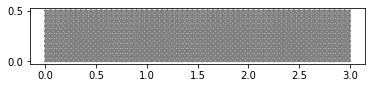

In [2]:
L = 3.0    # Length
H = 0.5    # Height
nx = 60
ny = 10
mesh = df.RectangleMesh(df.Point(0.0, 0.0), df.Point(L, H), nx, ny, "crossed")

df.plot(mesh)
plt.show()

Identify boundaries.

In [3]:
# define boundary as a class
class Bottom(df.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and df.near(x[1], 0)

bottom = Bottom()

class Top(df.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and df.near(x[1], H)

top = Top()

class Lateral(df.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (df.near(x[0], 0) or df.near(x[0], L))

lateral = Lateral()

# mark boundary parts
bndry = df.MeshFunction('size_t', mesh, mesh.topology().dim()-1, 0)
bottom.mark(bndry, 1)
top.mark(bndry, 2)
lateral.mark(bndry, 3)

ds = df.Measure("ds", subdomain_data=bndry)

Define mixed function space for pressure $p$, velocity $\mathbf{v}$ and extra stress tensor $\mathbb{B}$. In this example, we use inf-sup stable Taylor-Hood elements for velocity and pressure, which are quadratic in velocity and linear in pressure; and linear in extra stress tensor.

In [4]:
Ev = df.VectorElement("CG", mesh.ufl_cell(), 2) # 2 = quadratic elements
Ep = df.FiniteElement("CG", mesh.ufl_cell(), 1) # 1 = linear elements
E = df.MixedElement([Ev, Ev, Ep, Ep, Ep, Ep])
W = df.FunctionSpace(mesh, E)
print("Problem size: {0:d}".format(W.dim())) 

Calling FFC just-in-time (JIT) compiler, this may take some time.
Problem size: 24848


Declare boundary conditions.

In [5]:
zero = df.Constant(0)

bc_bot_uy = df.DirichletBC(W.sub(1).sub(1), zero, bndry, 1)
bc_bot_vy = df.DirichletBC(W.sub(0).sub(1), zero, bndry, 1)

bcs = [bc_bot_uy, bc_bot_vy] 

Write the weak form.

In [6]:
rho = df.Constant(1e3)
mu1 = df.Constant(10e3)
mu2 = df.Constant(100)
G = df.Constant(10e3)

dt = 0.05 #time step
t = dt #time
Tappl = df.Expression(("0.0", "(t<5.0) ? ((x[0]>0.2+0.4*t && x[0]<0.7+0.4*t) ? -5.0e3 : 0.0) : 0.0"), t = t, degree = 1)

v_, u_, b11_, b12_, b22_, p_ = df.TestFunctions(W)
w = df.Function(W)
v, u, b11, b12, b22, p = df.split(w)

w0 = df.Function(W)
v0, u0, b110, b120, b220, _ = df.split(w0)

B_ = df.as_tensor([[b11_,b12_],[b12_,b22_]])
B = df.as_tensor([[b11,b12],[b12,b22]])
B0 = df.as_tensor([[b110,b120],[b120,b220]])

I = df.Identity(2)
Fhat = I + df.grad(u)
Jhat = df.det(Fhat)

L = df.grad(v)
invFhat = df.inv(Fhat) 
Lhat = L*invFhat
Dhat = 0.5*(Lhat + Lhat.T)
That = -p*I + 2.0*mu2*Dhat + G*(B-I)
aleder = df.dot(invFhat, v - (u-u0)/dt)

matderv = (v-v0)/dt + df.grad(v)*aleder
oldroydderB = (B-B0)/dt + B.dx(0)*aleder[0] + B.dx(1)*aleder[1] - Lhat*B - B*(Lhat.T)

Eq1 = Jhat*df.tr(df.grad(v)*invFhat)*p_*df.dx
Eq2 = Jhat*df.inner(rho*matderv, v_)*df.dx + df.inner(That, df.grad(v_))*df.dx - df.inner(Tappl, v_)*ds(2)
Eq3 = Jhat*df.inner(oldroydderB, B_)*df.dx + Jhat*G/mu1*df.inner(B - I, B_)*df.dx
Eq4 = df.inner(df.grad(u), df.grad(u_))*df.dx

n = df.FacetNormal(mesh)
h = df.CellDiameter(mesh)
Eq5 = -df.inner(df.grad(u)*n, u_)*(ds(1)+ds(2)+ds(3)) + df.inner(df.grad(u_)*n, u - (u0 + dt*v))*(ds(1)+ds(2)+ds(3)) + 1000.0/h*df.inner(u - (u0 + dt*v), u_)*(ds(1)+ds(2)+ds(3))

Eq = Eq1 + Eq2 + Eq3 + Eq4 + Eq5

Prepare the non-linear solver and define the initial conditions.

In [7]:
problem=df.NonlinearVariationalProblem(Eq,w,bcs,df.derivative(Eq,w))
solver=df.NonlinearVariationalSolver(problem)

solver.parameters['newton_solver']['report'] = True
solver.parameters['newton_solver']['linear_solver'] = 'mumps'
solver.parameters['newton_solver']['lu_solver']['report'] = False
solver.parameters['newton_solver']['absolute_tolerance'] = 5e-9
solver.parameters['newton_solver']['relative_tolerance'] = 5e-9

ic = df.Expression(("0.0","0.0","0.0","0.0","1.0","0.0","1.0","0.0"), degree = 1)
w.assign(df.interpolate(ic, W))
w0.assign(df.interpolate(ic, W))

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


We create the XDMF files for storing the results.

In [8]:
# Initialize the files for writing the results
files = []
for name in ['v', 'u', 'B11', 'B12', 'B22', 'p']:
    with df.XDMFFile(df.MPI.comm_world, f"result/{name}.xdmf") as xdmf:
        xdmf.parameters["flush_output"] = True
        files.append(xdmf)

Iterate over the time steps until the t_end is not reached.

In [ ]:
while t < 8.0:
    df.info(f"t = {t:.2f}")
    Tappl.t = t
    solver.solve()
    # write the time-step into the file
    for func, name, xdmf in zip(w.split(True), ['v', 'u', 'B11', 'B12', 'B22', 'p'], files):
        func.rename(name, name)
        xdmf.write(func, t)

    w0.assign(w)
    t += dt


## Exercises 
1) Try different material parameters, study the effect of the ratio $\mu_1/G$.
2) Program the roller to roll forward and back, and then have a rest.